# Load Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
import pythainlp
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from pythainlp.util import normalize

In [10]:
path = "/content/drive/MyDrive/Colab Notebooks/CRM/Homework 11 /CustomerReviews.csv"
df = pd.read_csv(path)
df.sample(5)

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating
5,6,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,12f2b56b28bb4849a92690cedc1cc50a,กินให้อิ่ม ที่ momo,ร้านบุฟเฟ่ ชาบูแนวญี่ปุ่น สายเนื้อหมู เนื้อวัว...,4.0
12,13,4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,a96ec47b6cff4bd1834c90d603ef0a7e,อิ่ม อร่อย ฝุดฝุด,เมื่อหลายวันก่อนนัดหาข้าวทานกับเดอะแกงค์ และก็...,4.0
19,20,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,40e0e087f3914fd49a8933b5a29936ca,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,5.0
17,18,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,27a91236fe5e4559a4f097c97a480781,ร้านบุฟเฟ่ต์ ราคามิตรภาพ อยู่ชั้น4 ติดโรงหนัง ...,ร้านบุฟเฟ่ต์ที่มีโปรโมชั่นหัวละ199บาท ไม่รวมน้...,4.0
20,21,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,41841cb99ea243a3a8d4b006e946c586,แม้จะแปลกบ้าง แต่ก็ถือว่าอยู่ในเกณฑ์ที่ดี มีอา...,ก็ตามที่เขียนเลยครับ ว่า ถ้าจะจ่ายในราคา 199 บ...,NaN


# Tokenize words and Clean-up text

In [54]:
def tokenize_sentence(sentence):
    text = normalize(sentence)
    list_word = word_tokenize(text)
    # print(list_word)
    stopwords = list(thai_stopwords()) + [" "]
    list_word_not_stopwords = [i for i in list_word if i not in stopwords]
    # print(list_word_not_stopwords)
    return list_word_not_stopwords
  # return words

In [55]:
df['list_word_not_stopwords'] = df['Review'].apply(lambda x: tokenize_sentence(x))

In [56]:
df['list_word_not_stopwords'].sample(5)

19    [อร่อย, คุ้มค่า, สมราคา, บุ, ฟเฟ่, หมู, ผัก, น...
8     [มาน, ขา, บู, ชิ, ตอน, หิว, ไม่งั้น, คุ้ม, ฮ่า...
5     [ร้าน, บุ, ฟเฟ่, ชาบู, แนว, ญี่ปุ่น, สาย, เนื้...
1     [นึกถึง, ชาบู, ญี่ปุ่น, คิดถึง, โม, โม่, พาราไ...
7     [ร้าน, ชาบู, เฟรนไชส์, รสชาติ, ดีมาก, คุ้มค่า,...
Name: list_word_not_stopwords, dtype: object

# Create the Dictionary and Corpus needed for Topic Modeling


In [69]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [60]:
# Create Dictionary
data = df['list_word_not_stopwords']
id2word = corpora.Dictionary(data)

# Create Corpus
texts = data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 6), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 2), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 3), (34, 1), (35, 3), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)]]


In [63]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('\n', 6),
  ('1', 1),
  ('4', 1),
  ('560', 1),
  ('กิน', 5),
  ('ข้างนอก', 1),
  ('ความต้องการ', 1),
  ('คอ', 1),
  ('คุณภาพ', 1),
  ('คุณภาพดี', 1),
  ('คุ้ม', 1),
  ('จำกัด', 1),
  ('ซุป', 1),
  ('ดำ', 1),
  ('ดี', 1),
  ('ดีมาก', 1),
  ('ถาด', 1),
  ('ถาม', 1),
  ('น่ารัก', 1),
  ('น้ำ', 1),
  ('น้ำจิ้ม', 1),
  ('บริการ', 3),
  ('บาท', 1),
  ('ประทับใจ', 2),
  ('พนักงาน', 1),
  ('พอกับ', 1),
  ('รสชาติ', 3),
  ('ราคา', 1),
  ('ร้าน', 1),
  ('สรุป', 1),
  ('สะอาดสะอ้าน', 1),
  ('สัน', 1),
  ('หลากหลาย', 1),
  ('อร่อย', 3),
  ('อันนี้', 1),
  ('อาหาร', 3),
  ('เคลม', 1),
  ('เซ็ท', 1),
  ('เต้าเจี้ยว', 1),
  ('เนื้อ', 2),
  ('เป็ด', 1),
  ('เผ็ด', 1),
  ('แบบนี้', 1),
  ('แปลกใหม่', 1),
  ('แฟน', 1),
  ('โดยรวม', 1),
  ('โมจิ', 1),
  ('ใส่ใจ', 1),
  ('ไม่ต้อง', 1),
  ('ไอติม', 1)]]

#  Building the Topic Model

In [64]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# View the topics in LDA model

In [67]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.046*":" + 0.037*"โม" + 0.037*"\n" + 0.028*"น้ำ" + 0.019*"ดำ" + 0.019*"น้ำจิ้ม" + 0.019*"เลือก" + 0.019*"สุกี้" + 0.019*"ชาบู" + 0.019*"/"'), (1, '0.031*"อร่อย" + 0.031*"," + 0.031*"จ่าย" + 0.031*"สั่ง" + 0.031*"ราคา" + 0.031*"ซูชิ" + 0.016*"น้ำ" + 0.016*"บาท" + 0.016*"กิน" + 0.016*"ของหวาน"'), (2, '0.032*"กิน" + 0.032*"ร้าน" + 0.032*"คน" + 0.032*"รอ" + 0.021*"คิว" + 0.021*"ดู" + 0.021*"ผัก" + 0.021*"บุฟเฟต์" + 0.011*"เนื้อ" + 0.011*"สด"'), (3, '0.002*"\n" + 0.002*"น้ำ" + 0.002*":" + 0.002*"-" + 0.002*"โม" + 0.002*"บาท" + 0.002*"ราคา" + 0.002*"สาขา" + 0.002*"ทาน" + 0.002*"ซุป"'), (4, '0.037*"\n" + 0.031*"ทาน" + 0.031*"ซุป" + 0.031*"บาท" + 0.025*"-" + 0.025*"ราคา" + 0.025*"น้ำ" + 0.013*"ดี" + 0.013*"เนื้อ" + 0.013*"คุ้ม"'), (5, '0.042*"\n" + 0.031*"น้ำ" + 0.021*"ร้าน" + 0.021*"ทาน" + 0.021*"ซุป" + 0.021*"เลือก" + 0.021*"อร่อย" + 0.021*":" + 0.017*"ชาบู" + 0.011*"สาขา"'), (6, '0.049*"\n" + 0.033*"ร้าน" + 0.025*"น้ำ" + 0.024*"ชาบู" + 0.024*"ชอบ" + 0.024*"ดีมาก" + 0.017*"รสชาติ" + 0

# Compute Model Perplexity and Coherence Score

In [71]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.5174859341011935

Coherence Score:  0.5515548768469241


a coherence score of 0.5515.

In [82]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [103]:
coherence_values = []
model_list = []
start = 2
limit = 5
step = 1
for num_topics in range(start, limit, step):
    model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

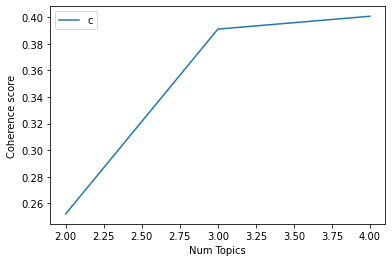

In [104]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline
start = 2
limit = 5
step = 1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [105]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.252
Num Topics = 3  has Coherence Value of 0.3911
Num Topics = 4  has Coherence Value of 0.4008


In [110]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.036*"\n" + 0.025*"น้ำ" + 0.024*":" + 0.019*"ทาน" + 0.016*"เนื้อ" + 0.015*"เลือก" + 0.015*"ชาบู" + 0.014*"ซุป" + 0.011*"อร่อย" + 0.011*"ดำ"'), (1, '0.022*"ร้าน" + 0.022*"\n" + 0.020*"น้ำ" + 0.016*"อร่อย" + 0.015*"ซุป" + 0.014*"บาท" + 0.014*"ราคา" + 0.013*"ดี" + 0.012*"ทาน" + 0.011*"ชาบู"'), (2, '0.044*"\n" + 0.024*"กิน" + 0.020*"ร้าน" + 0.015*"-" + 0.012*"เนื้อ" + 0.012*"คน" + 0.012*"อาหาร" + 0.012*"ดี" + 0.011*"สด" + 0.010*"รสชาติ"'), (3, '0.020*"กุ้ง" + 0.020*"ม" + 0.020*"ปุระ" + 0.020*"เท" + 0.019*"\n" + 0.016*"ทาน" + 0.016*"คุ้ม" + 0.012*"ชาบู" + 0.011*"อาหาร" + 0.011*"ชอบ"')]


# Finding the dominant topic in each sentence

In [119]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Array of top 10 topics
    top10array = []
 
    for row in range(ldamodel.num_topics):
        wp = ldamodel.show_topic(row)
        topic_keywords = ", ".join([word for word, prop in wp])
        top10array.append((row+1, topic_keywords))
 
    top10dict = dict(top10array)
 
    sent_topics_df = pd.DataFrame(pd.DataFrame([sorted(topic[0], key=lambda x: (x[1]), reverse=True) 
                                                for topic in ldamodel[corpus]])[0])
    sent_topics_df.columns=["Data"]
    sent_topics_df['Dominant_Topic'] = sent_topics_df.Data.apply(lambda x: x[0]+1)
    sent_topics_df['Perc_Contribution'] = sent_topics_df.Data.apply(lambda x: round(x[1],4))
    sent_topics_df['Topic_Keywords'] = sent_topics_df.Dominant_Topic.apply(lambda x: top10dict[x])
 
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents.rename("Text")], axis=1)
    sent_topics_df = sent_topics_df[['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']]
    return(sent_topics_df)

In [120]:
df_topic_sents_keywords  = format_topics_sentences(optimal_model,corpus,data)

In [131]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.9979,"\n, กิน, ร้าน, -, เนื้อ, คน, อาหาร, ดี, สด, รส...","[ร้าน, บริการ, ดีมาก, พนักงาน, น่ารัก, สะอาดสะ..."
1,1,2,0.9975,"ร้าน, \n, น้ำ, อร่อย, ซุป, บาท, ราคา, ดี, ทาน,...","[นึกถึง, ชาบู, ญี่ปุ่น, คิดถึง, โม, โม่, พาราไ..."
2,2,1,0.9991,"\n, น้ำ, :, ทาน, เนื้อ, เลือก, ชาบู, ซุป, อร่อ...","[ทาน, นั่ง, โต๊ะ, หม้อ, โต๊ะ, ยังมี, ฉาก, กั้น..."
3,3,1,0.9959,"\n, น้ำ, :, ทาน, เนื้อ, เลือก, ชาบู, ซุป, อร่อ...","[นึกถึง, ชาบู, เนื้อ, ราคา, โหด, เกินไป, นึกถึ..."
4,4,3,0.9967,"\n, กิน, ร้าน, -, เนื้อ, คน, อาหาร, ดี, สด, รส...","[เดิน, หน้า, ร้าน, ได้กลิ่น, ชาบู, หอ, มมาก, โ..."
5,5,4,0.9958,"กุ้ง, ม, ปุระ, เท, \n, ทาน, คุ้ม, ชาบู, อาหาร,...","[ร้าน, บุ, ฟเฟ่, ชาบู, แนว, ญี่ปุ่น, สาย, เนื้..."
6,6,1,0.8022,"\n, น้ำ, :, ทาน, เนื้อ, เลือก, ชาบู, ซุป, อร่อ...","[Number, 20, :, โม, โม, –, พารา, ได, ส์, (, สา..."
7,7,2,0.9977,"ร้าน, \n, น้ำ, อร่อย, ซุป, บาท, ราคา, ดี, ทาน,...","[ร้าน, ชาบู, เฟรนไชส์, รสชาติ, ดีมาก, คุ้มค่า,..."
8,8,4,0.9956,"กุ้ง, ม, ปุระ, เท, \n, ทาน, คุ้ม, ชาบู, อาหาร,...","[มาน, ขา, บู, ชิ, ตอน, หิว, ไม่งั้น, คุ้ม, ฮ่า..."
9,9,4,0.9971,"กุ้ง, ม, ปุระ, เท, \n, ทาน, คุ้ม, ชาบู, อาหาร,...","[ชอบ, กุ้ง, ทอด, เท, ม, ปุระ, กุ้ง, เท, ม, ปุร..."


In [122]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,1,0.9991,"\n, น้ำ, :, ทาน, เนื้อ, เลือก, ชาบู, ซุป, อร่อ...","[ทาน, นั่ง, โต๊ะ, หม้อ, โต๊ะ, ยังมี, ฉาก, กั้น..."
1,2,0.9986,"ร้าน, \n, น้ำ, อร่อย, ซุป, บาท, ราคา, ดี, ทาน,...","[หลังจากที่, ลอง, สาขา, ยู, นม, อลล์, รอบ, สาข..."
2,3,0.9994,"\n, กิน, ร้าน, -, เนื้อ, คน, อาหาร, ดี, สด, รส...","[ห่างหาย, สำหรับ, ชาบู, ชิ, ร้าน, ขึ้นราคา, แถ..."
3,4,0.9971,"กุ้ง, ม, ปุระ, เท, \n, ทาน, คุ้ม, ชาบู, อาหาร,...","[ชอบ, กุ้ง, ทอด, เท, ม, ปุระ, กุ้ง, เท, ม, ปุร..."


In [138]:
pd.set_option('display.max_colwidth', None)
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,1,0.9991,"\n, น้ำ, :, ทาน, เนื้อ, เลือก, ชาบู, ซุป, อร่อย, ดำ","[ทาน, นั่ง, โต๊ะ, หม้อ, โต๊ะ, ยังมี, ฉาก, กั้น, \n, น้ำ, ซุป, เลือก, 2, รส, น้ำจิ้ม, แตก, ต่างกัน, ตามน้ำ, ซุป, เลือก, ชาบู, น้ำ, ดำ, น้ำ, ซุป, เห็ด, \n, ชาบู, น้ำ, ดำ, :, หวาน, เค็ม, รสชาติ, เข้มข้น, เสิร์ฟ, ไข่, สด, เป็นผู้ใหญ่, ชอบ, หวาน, ชอบ, \n, น้ำ, ซุป, เห็ด, :, มีชื่อ, ภาษา, ญี่ปุ่น, 555, เสิร์ฟ, เห็ด, น้ำจิ้ม, ซอย, ซอส, รสชาติ, จืด, แนว, น้ำ, ซุป, ใส, \n, เนื้อสัตว์, เลือก, เนื้อวัว, 2, ,, เนื้อหมู, 2, ,, เนื้อ, เป็ด, ,, ไก่, ไม้, ไผ่, สั่ง, ลอง, \n, เนื้อวัว, :, อร่อย, กก, ชิ้น, เนื้อ, นุ่ม, กิน, ชาบู, น้ำ, ดำ, เข้ากัน, \n, เนื้อหมู, :, คุ, โร, บู, ตะ, อร่อย, ...]"
1,2,0.9986,"ร้าน, \n, น้ำ, อร่อย, ซุป, บาท, ราคา, ดี, ทาน, ชาบู","[หลังจากที่, ลอง, สาขา, ยู, นม, อลล์, รอบ, สาขา, เดอะ, มอลล์, กะปิ, ชั้น, 4, โซน, MCC, HALL, ด้านใน, ติดกับ, ค่ายมวย, ตอนแรก, นึก, ชาบู, 199, ธรรมดา, ที่ไหนได้, พิซซ่า, นา, พิซ, เซ, อเรีย, \n, สำหรับ, ราคา, 199, บาท, ทาน, หมู, พิซซ่า, ทอด, ซุป, แกงเขียวหวาน, น้ำ, ซุป, 1, รสชาติ, \n, -, อยากได้, น้ำ, ซุป, 2, รสชาติ, จ่าย, คนละ, 40, บาท, \n, -, น้ำดื่ม, รี, ฟี, ล, 39, บาท, \n, -, ทาน, เนื้อ, คนละ, 49, บาท, \n, -, ซูชิ, ของหวาน, สั่ง, จ่าย, ราคา, เมนู, \n, อิ่ม, คุ้ม, ดี, เบ, น้ำ, ซุป, เข้มข้น, ราคา, ตัวเลือก, หิว, แวะ, แน่นอน]"
2,3,0.9994,"\n, กิน, ร้าน, -, เนื้อ, คน, อาหาร, ดี, สด, รสชาติ","[ห่างหาย, สำหรับ, ชาบู, ชิ, ร้าน, ขึ้นราคา, แถม, ลด, เวลา, คุณภาพ, อาหาร, ดู, แย่, ลา, กลับมา, อีกครั้ง, ได้ยิน, ข่าว, "", กุ้ง, ปอกเปลือก, "", กลับมา, งาน, กุ้ง, \n, Shabushi, ตั้งอยู่, ชั้น, G, ห้าง, เดอะ, มอลล์, กะปิ, ตัว, ร้าน, ตั้งอยู่, โซน, หน้า, ห้าง, ฝั่ง, ติด, ถนนใหญ่, หาไม่, ร้าน, เด่น, สำหรับ, สาขา, เสาร์, -, อาทิตย์, วันหยุด, คน, รอ, คิว, (, สาเหตุ, เลิก, กิน, ), ธรรมดา, คน, ร้าน, จุ, คน, คน, แน่น, รู้สึก, แออัด, เหมือนกัน, \n, สำหรับ, อาหาร, สาขา, เทียบ, สาขา, กิน, รู้สึก, สด, สะอาด, ระดับ, ใช้ได้, สายพาน, นะคะ, รายการ, พนักงาน, กิน, กุ้ง, สด, ออกมา, ถูกใจ, ใจมา, กิน, กุ้ง, ราคา, บุฟเฟ่ต์, 359, Net, /คน, กิน, ...]"
3,4,0.9971,"กุ้ง, ม, ปุระ, เท, \n, ทาน, คุ้ม, ชาบู, อาหาร, ชอบ","[ชอบ, กุ้ง, ทอด, เท, ม, ปุระ, กุ้ง, เท, ม, ปุระ, คุ้ม, ทาน, ดึก, นึก, ผิดหวัง, กุ้ง, เท, ม, ปุระ, กี่, ตัว, ทอด, เติม, ทาน, สมใจ, กลาย, เป็นมา, ชาบู, ชิ, ทานอาหาร, ญี่, ปุ, นพ, วก, ซูชิ, กุ้ง, เท, ม, ปุระ, เป็นหลัก, ชาบู, อาหารเสริม, ซะงั้น, เมนู, ปลา, ไข่, ชั่วคราว, น้ะ, อย่า, ลืม, ทาน, ไอติม, เย็น, ชื่นใจ, ตบท้าย]"
